In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv("framingham.csv")

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
import pickle
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Load Dataset
# Assuming df is already loaded



X = df.drop(columns=["TenYearCHD"])  # Features
y = df["TenYearCHD"]  # Target (1 = CHD Risk, 0 = No CHD Risk)

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save Scaler for Future Use
joblib.dump(scaler, "scaler.pkl")  # ✅ Save the scaler separately

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Neural Network Model
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dropout(0.1),
    Dense(1, activation="sigmoid")  # Binary Classification Output
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=5,          # Stop if no improvement after 5 epochs
    restore_best_weights=True  # Restore the best model
)

# Train the Model with Early Stopping
model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping]  # Use early stopping callback
)

# Evaluate Model
y_pred = (model.predict(X_test) > 0.5).astype("int")
print(classification_report(y_test, y_pred))

# Save Model in H5 Format (for Web App Deployment)
model.save("heart_disease_model.h5")

# ✅ Custom Wrapper to Allow Pickling of Keras Model
class KerasModelWrapper:
    def __init__(self, model_path):
        self.model_path = model_path
        self.model = tf.keras.models.load_model(model_path)
    
    def predict(self, input_data):
        return (self.model.predict(input_data) > 0.5).astype("int")

# Save Wrapped Model as `.pkl`
keras_wrapper = KerasModelWrapper("heart_disease_model.h5")
with open("heart_disease_model.pkl", "wb") as f:
    pickle.dump(keras_wrapper, f)

print("✅ Model and scaler saved as .pkl successfully!")

C:\Users\ANWESA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6641 - loss: 0.6050 - val_accuracy: 0.8282 - val_loss: 0.4400
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8528 - loss: 0.4198 - val_accuracy: 0.8282 - val_loss: 0.4320
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8493 - loss: 0.4026 - val_accuracy: 0.8282 - val_loss: 0.4273
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8588 - loss: 0.3806 - val_accuracy: 0.8282 - val_loss: 0.4241
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8475 - loss: 0.4067 - val_accuracy: 0.8269 - val_loss: 0.4262
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8433 - loss: 0.3897 - val_accuracy: 0.8269 - val_loss: 0.4236
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8449 - loss: 0.3930 - val_accuracy: 0.8282 - val_loss: 0.4258
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8511 - loss: 0.3745 - val_accuracy: 0.8269 - val_loss

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       622
           1       0.00      0.00      0.00       129

    accuracy                           0.83       751
   macro avg       0.41      0.50      0.45       751
weighted avg       0.69      0.83      0.75       751



✅ Model and scaler saved as .pkl successfully!


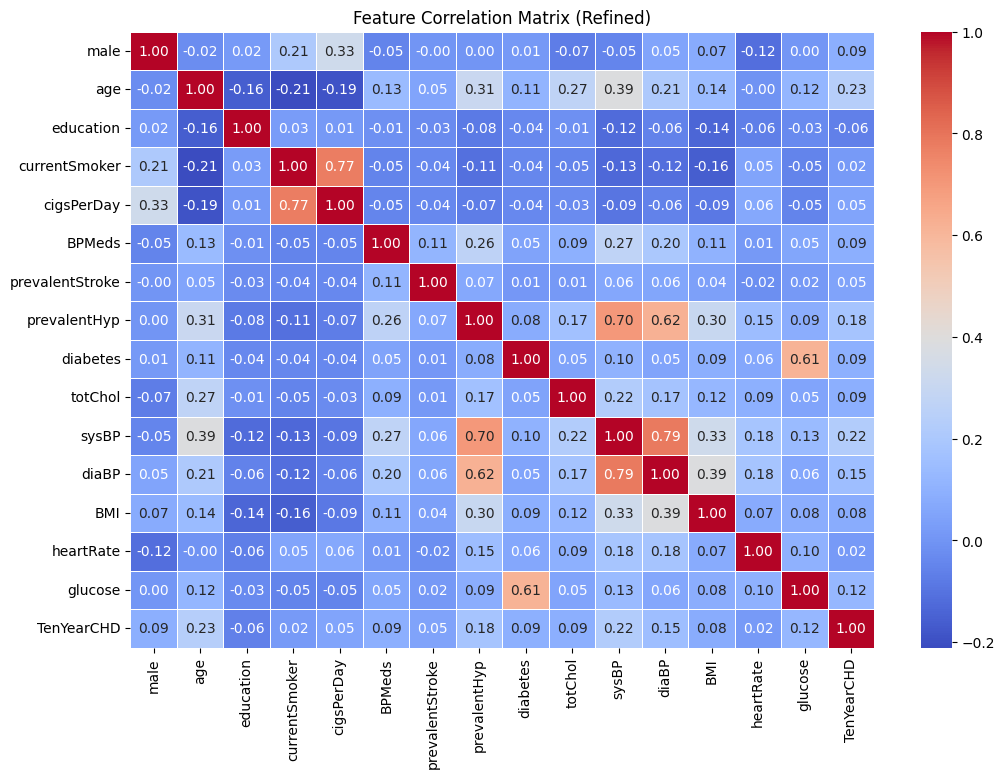

In [7]:
# Generate and visualize feature correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix (Refined)")
plt.show()
